In [1]:
import numpy
import matplotlib.pyplot as pyplot

In [22]:
#variables
T = 10                  # Time
Nt = 1000                # n va de 0 à Nt
I = 0.3                   # constant amplitude
u = numpy.zeros(Nt+1)   # solution
w = 5                   # angular frequency [rad/s]




t = numpy.linspace(0, T, Nt+1)  #mesh points in time
dt =t[1]-t[0]                   # constant time step

u[0] = I
u[1] = u[0]- 0.5*dt**2*w**2*u[0]

for n in range(1,Nt):
    u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]

In [45]:
#variables
T = 10                 # Time
Nt = 10               # n va de 0 à Nt
I = 3                   # constant amplitude
u = numpy.zeros(Nt+1)   # solution
w = 2*3.14                  # angular frequency [rad/s]

#Making a solver function

def solver(I,w,dt,T):
    """
    solve u'' + w**2*u = 0 for t in [0,T]
    boundary conditions : u(0) = I and u'(0) = 0
    Method : central finite difference with time step dt
    """
    Nt = int(round(T/dt)) # because dt = T/Nt by definition as dt is the constant length of time step
    dt = float(dt)
    u = numpy.zeros(Nt+1)
    t = numpy.linspace(0, Nt*dt, Nt+1)
    
    
    #Boundary conditions
    u[0] = I
    u[1] = u[0]- 0.5*dt**2*w**2*u[0]
    
    for n in range(1,Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    
    return u, t

print (u)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Pourquoi mon u est obtenu a zeros ???


Now, let's plot the numerical and the exact solution

In [29]:
I = 3
t = 10
w = 15
def u_exact (t,I,w):
    u_exact = I.numpy(cos(w*t))
    return u_exact
print(u_exact)

<function u_exact at 0x11930b830>


TypeError: float() argument must be a string or a number, not 'function'

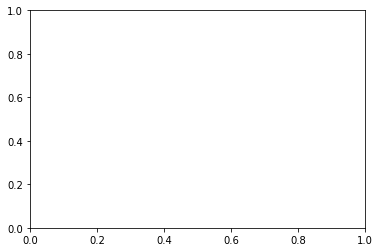

In [37]:
pyplot.plot(t,u_exact)
pyplot.xlabel('t')

v(t) = u'(t)

In [43]:
v = numpy.zeros(len(u))
# use central difference for internal points
for i in range (1,len(u)-1):
    v[i] = (u[i+1] - u[i-1])/(2*dt)

    
#initial condition 
v[0] = 0

# use backward difference at the final mesh point
v[-1] = (u[-1]-u[-2])/dt 



SyntaxError: 'return' outside function (<ipython-input-43-a314e8e3765a>, line 5)

In [46]:
def test():
    from math import pi
    I = 1
    w = 2*pi
    dt = 0.1
    T = 1
    u = numpy.array([1, 0.8, 0.28])
    u, t = solver(I, w, dt, T)
    diff = numpy.abs(u-u[:3]).max
    tol = 1e-14
    assert diff < tol

scipy

In [52]:
#Representation of sparse matrix and right hand side
nx = 20
ny = 20

diagonal = numpy.zeros(nx+1)
lower = numpy.zeros(nx)
upper = numpy.zeros(nx)
b = numpy.zeros(nx+1)

